# Decision Tree#
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
http://scikit-learn.org/stable/modules/tree.html

**Some advantages of decision trees are:**
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. 
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. 
* Able to handle multi-output problems.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

**The disadvantages of decision trees include:**
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. 
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [135]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=10)


In [153]:
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = (sum((y_predict==y_test).astype(float)) / len(y_predict))
print(accuracy)

0.973684210526


In [113]:
print(iris.feature_names)
print(iris.target_names)
print(data[:2])
print(target[:2])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]
[0 0]


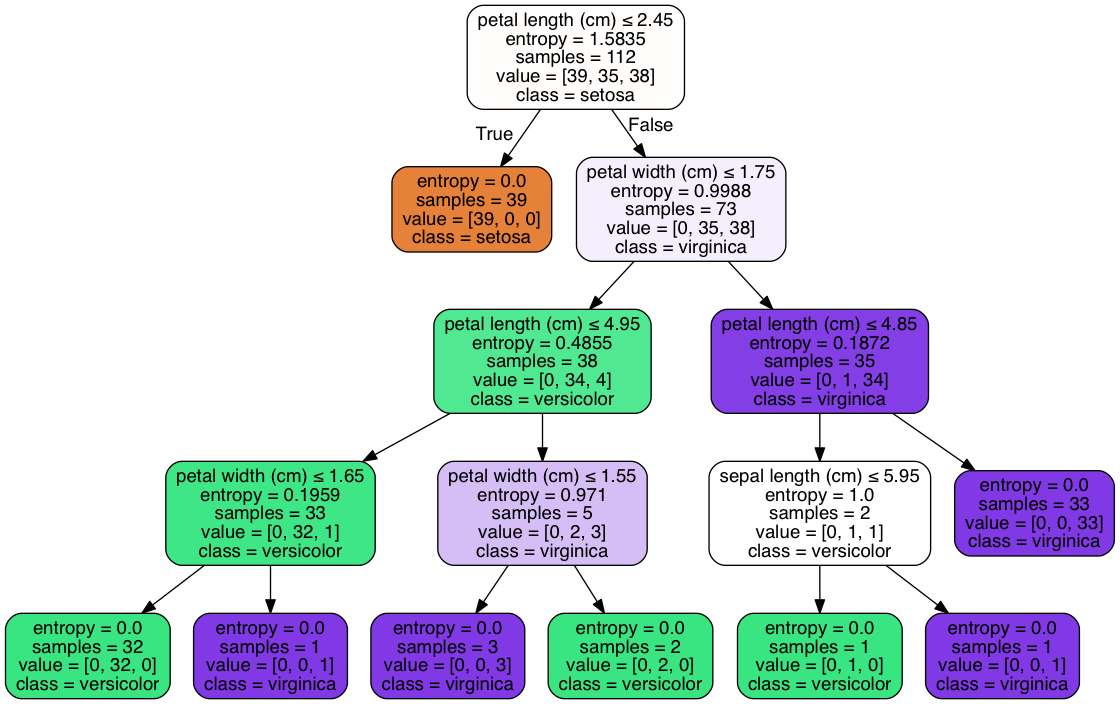

In [154]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f)

import os
os.unlink('iris.dot')

import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 

dot_data = tree.export_graphviz(model, out_file=None) 

from IPython.display import Image  
import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  